In [19]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Convolution2D,Dense,Flatten,InputLayer,MaxPool2D,Dropout

In [20]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [21]:
X_train.shape

(60000, 28, 28)

In [22]:
def preprocess(X,y):
    X = X.reshape((-1,28,28,1))
    X = X/255.0
    y = to_categorical(y)
    return X,y

In [23]:
X_train,y_train = preprocess(X_train,y_train)

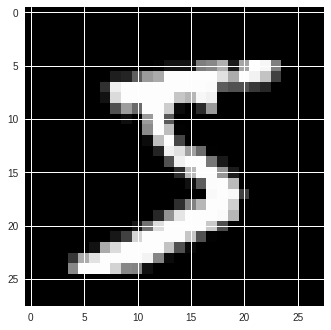

In [24]:
plt.imshow(X_train[0].reshape(28,28),cmap="gray")

In [32]:
model = Sequential()

In [33]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape = (28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [34]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
hist = model.fit(X_train,y_train,batch_size=128,epochs=13,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/13
54000/54000 [==============================] - 3s 53us/step - loss: 0.2657 - accuracy: 0.9209 - val_loss: 0.0608 - val_accuracy: 0.9830
Epoch 2/13
54000/54000 [==============================] - 3s 48us/step - loss: 0.0675 - accuracy: 0.9792 - val_loss: 0.0561 - val_accuracy: 0.9842
Epoch 3/13
54000/54000 [==============================] - 3s 48us/step - loss: 0.0479 - accuracy: 0.9849 - val_loss: 0.0430 - val_accuracy: 0.9878
Epoch 4/13
54000/54000 [==============================] - 3s 48us/step - loss: 0.0371 - accuracy: 0.9886 - val_loss: 0.0418 - val_accuracy: 0.9880
Epoch 5/13
54000/54000 [==============================] - 3s 48us/step - loss: 0.0293 - accuracy: 0.9909 - val_loss: 0.0393 - val_accuracy: 0.9897
Epoch 6/13
54000/54000 [==============================] - 3s 47us/step - loss: 0.0257 - accuracy: 0.9921 - val_loss: 0.0360 - val_accuracy: 0.9897
Epoch 7/13
54000/54000 [==============================] - 3s 48us/ste

In [36]:
h = hist.history

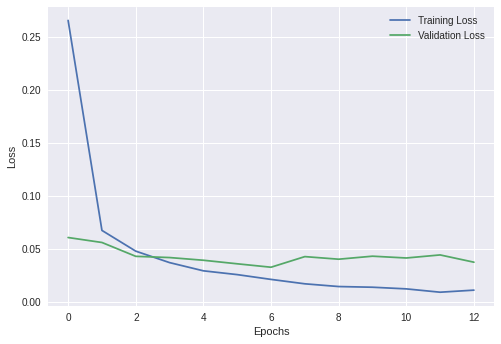

In [37]:
plt.style.use('seaborn')
plt.plot(h['loss'],label='Training Loss')
plt.plot(h['val_loss'],label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

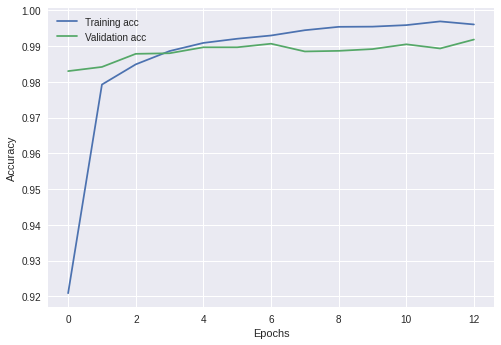

In [38]:
plt.style.use('seaborn')
plt.plot(h['accuracy'],label='Training acc')
plt.plot(h['val_accuracy'],label='Validation acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [39]:
X_test,y_test = preprocess(X_test,y_test)

In [40]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 64us/step


[0.043312367554970845, 0.9882000088691711]